### In this notebook
1. Cleaning the corpora of text from mentions, hashtags and non-ASCII characters
2. Removing duplicates or similar posts, dropping posts in languages other than english or posts shorter than 200 characters
3. Visualizing the activity of the instagram page over the considered time period
4. Exporting the clean dataset

### Importing necessary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect
import string_grouper
import re
import twint
import nest_asyncio
nest_asyncio.apply()

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [65]:
df = pd.read_csv('df.csv')[['Datetime', 'Text', 'Likes', 'Comments']]

df

,Datetime,Text,Likes,Comments
0,2015-01-01 12:18:42,#Throwback The Economist’s cover 12 years ago:...,175.0,3.0
1,2015-01-02 23:01:41,Our new issue on a New York newsstand: Workers...,191.0,2.0
2,2015-01-03 18:08:19,KAL’s cartoon January 3rd #Cartoon #Graphic #C...,167.0,1.0
3,2015-01-04 18:08:11,Letters from our audience: A reader recently g...,73.0,3.0
4,2015-01-05 17:40:10,This Economist #strikingimage is from a story ...,46.0,2.0
...,...,...,...,...
14826,2022-02-08 15:02:12,"On February 6th, more than a week after thousa...",3041.0,397.0
14827,2022-02-08 17:02:09,Omicron is set to overtake Delta as the global...,5483.0,210.0
14828,2022-02-08 19:02:55,British campaigners and lawmakers are in no do...,8456.0,228.0
14829,2022-02-08 21:01:50,Every year Disney and its rivals promise to sp...,7434.0,71.0


### Removing mentions and hashtags

In [69]:
df.iloc[7,1]

'How do members of the 114th Congress compare with the average American? The most obvious difference is that they are 66 times as likely to be lawyers. Read more by searching “How politicians are unlike America” via our website. For more pictures like this follow @theeconomist on Instagram #Dailychart #Economist #TheEconomist #America #Congress #World #WorldNews'

In [70]:
df['Text'].replace({'#([a-zA-Z0-9_]{1,50})':''}, regex=True, inplace=True)
df['Text'].replace({r'(@|https?)\S+|#':''}, regex=True, inplace=True)

In [71]:
df.iloc[7,1]

'How do members of the 114th Congress compare with the average American? The most obvious difference is that they are 66 times as likely to be lawyers. Read more by searching “How politicians are unlike America” via our website. For more pictures like this follow  on Instagram       '

### Removing non-ASCII characters

In [85]:
df.iloc[60,1]

"Frontier soldiers undertake  long-distance endurance training in Heihe,  Heilongjiang province, China in temperatures  of - 26 °C on January 28th 2015.  The purpose of this exercise is to improve the  soldier's ability to complete tasks under extreme weather conditions.  Credit: ChinaFotoPress via Getty Images "

In [86]:
df['Text'].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df['Text'].replace({'\n':''}, regex=True, inplace=True)

In [87]:
df.iloc[60,1]

"Frontier soldiers undertake  long-distance endurance training in Heihe,  Heilongjiang province, China in temperatures  of - 26 C on January 28th 2015.  The purpose of this exercise is to improve the  soldier's ability to complete tasks under extreme weather conditions.  Credit: ChinaFotoPress via Getty Images "

### Dropping duplicates (n = 135)

In [41]:
df.drop_duplicates('Text', inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(14696, 4)

### Dropping posts that are very similar to each other (n = 379)

In [42]:
matches = string_grouper.match_strings(df['Text']).sort_values(by='similarity')
index = matches[matches['left_Text'] != matches['right_Text']]['left_index']

df.drop(index, inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(14317, 4)


### Dropping posts in languages other than English (n = 3)

In [43]:
Lang = []

for text in df['Text']:
    try:
        Lang.append(detect(text))
    except:
        language = "error"
        Lang.append("Unknown")
    
df['Lang'] = Lang
df

,Datetime,Text,Likes,Comments,Lang
0,2015-01-01 12:18:42,The Economists cover 12 years ago: Our lead a...,175.0,3.0,en
1,2015-01-02 23:01:41,Our new issue on a New York newsstand: Workers...,191.0,2.0,en
2,2015-01-03 18:08:19,KALs cartoon January 3rd,167.0,1.0,en
3,2015-01-04 18:08:11,Letters from our audience: A reader recently g...,73.0,3.0,en
4,2015-01-05 17:40:10,This Economist is from a story published in M...,46.0,2.0,en
...,...,...,...,...,...
14312,2022-02-08 15:02:12,"On February 6th, more than a week after thousa...",3041.0,397.0,en
14313,2022-02-08 17:02:09,Omicron is set to overtake Delta as the global...,5483.0,210.0,en
14314,2022-02-08 19:02:55,British campaigners and lawmakers are in no do...,8456.0,228.0,en
14315,2022-02-08 21:01:50,Every year Disney and its rivals promise to sp...,7434.0,71.0,en


In [44]:
df.groupby('Lang')['Text'].count()

Lang
af        1
en    14314
no        1
tl        1
Name: Text, dtype: int64

In [45]:
df = df[df['Lang']=='en']
df.reset_index(drop=True, inplace=True)
df

,Datetime,Text,Likes,Comments,Lang
0,2015-01-01 12:18:42,The Economists cover 12 years ago: Our lead a...,175.0,3.0,en
1,2015-01-02 23:01:41,Our new issue on a New York newsstand: Workers...,191.0,2.0,en
2,2015-01-03 18:08:19,KALs cartoon January 3rd,167.0,1.0,en
3,2015-01-04 18:08:11,Letters from our audience: A reader recently g...,73.0,3.0,en
4,2015-01-05 17:40:10,This Economist is from a story published in M...,46.0,2.0,en
...,...,...,...,...,...
14309,2022-02-08 15:02:12,"On February 6th, more than a week after thousa...",3041.0,397.0,en
14310,2022-02-08 17:02:09,Omicron is set to overtake Delta as the global...,5483.0,210.0,en
14311,2022-02-08 19:02:55,British campaigners and lawmakers are in no do...,8456.0,228.0,en
14312,2022-02-08 21:01:50,Every year Disney and its rivals promise to sp...,7434.0,71.0,en


### Dropping posts shorter than 200 characters (n = 2100)

In [46]:
df['Length'] = df['Text'].str.len()

df.describe()

,Likes,Comments,Length
count,14314.000000,14314.000000,14314.000000
mean,8394.731661,131.328769,505.181431
std,8902.090087,252.357181,261.234191
min,-1.000000,0.000000,17.000000
25%,3419.000000,27.000000,281.000000
50%,6125.500000,59.000000,505.000000
75%,10405.000000,139.000000,699.000000
max,319057.000000,9710.000000,2163.000000


In [47]:
df = df[df['Length']>200]
df.reset_index(drop=True, inplace=True)
df.shape

(12214, 6)

### Data visualization

#### Page activity by months (each year)

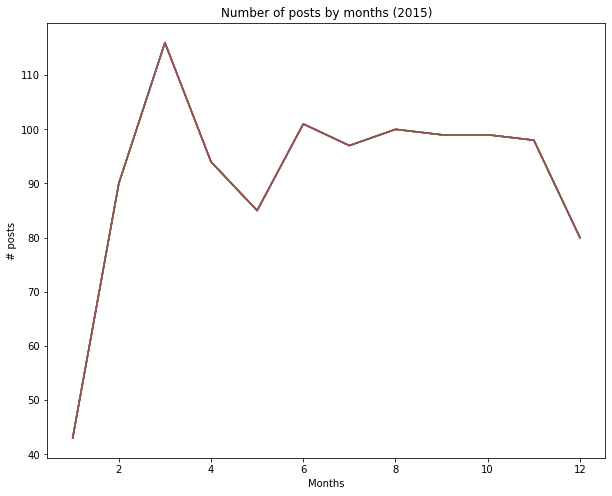

In [61]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df['Month'] = df['Datetime'].dt.month
plt.figure(figsize=(10, 8))
plt.plot(df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2015)]['Month'].unique(), (df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2015)].groupby('Month').count()))
plt.title('Number of posts by months (2015)')
plt.ylabel('# posts')
plt.xlabel('Months')
plt.show()

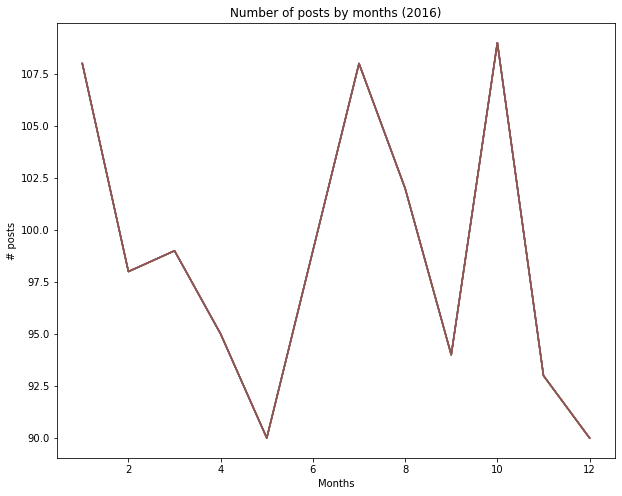

In [54]:
plt.figure(figsize=(10, 8))
plt.plot(df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2016)]['Month'].unique(), (df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2016)].groupby('Month').count()))
plt.title('Number of posts by months (2016)')
plt.ylabel('# posts')
plt.xlabel('Months')
plt.show()

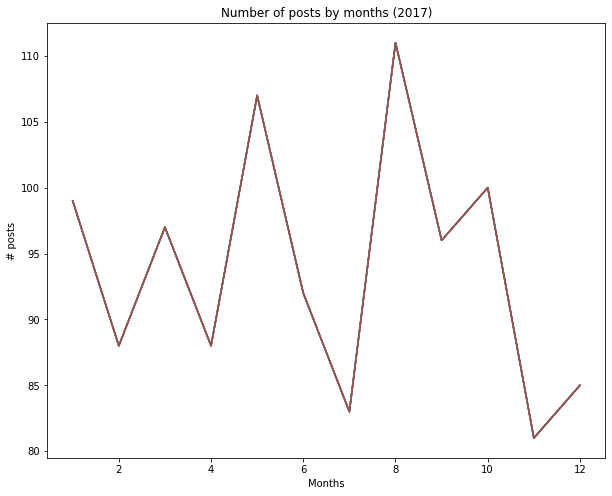

In [55]:
plt.figure(figsize=(10, 8))
plt.plot(df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2017)]['Month'].unique(), (df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2017)].groupby('Month').count()))
plt.title('Number of posts by months (2017)')
plt.ylabel('# posts')
plt.xlabel('Months')
plt.show()

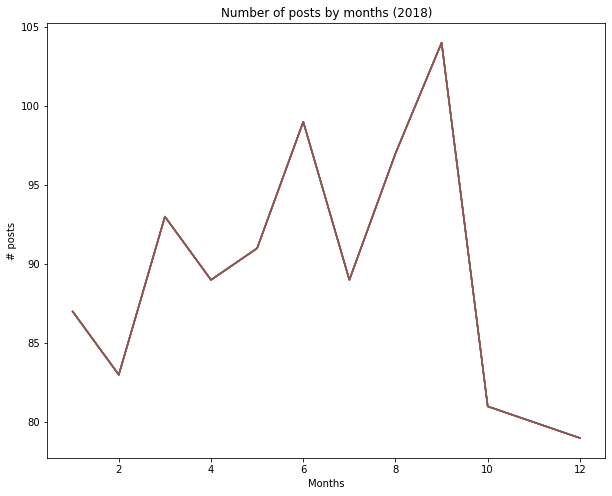

In [56]:
plt.figure(figsize=(10, 8))
plt.plot(df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2018)]['Month'].unique(), (df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2018)].groupby('Month').count()))
plt.title('Number of posts by months (2018)')
plt.ylabel('# posts')
plt.xlabel('Months')
plt.show()

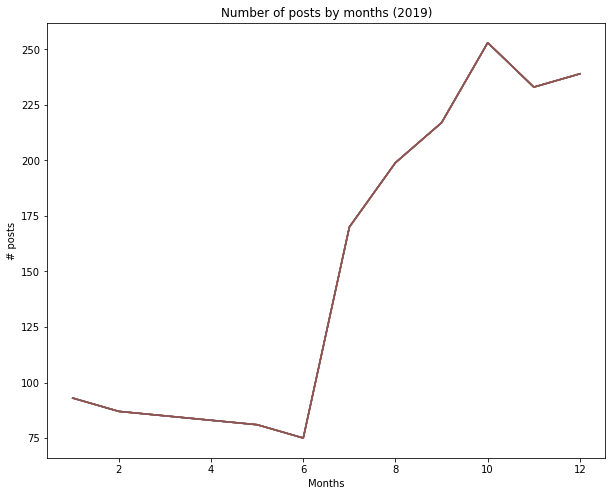

In [57]:
plt.figure(figsize=(10, 8))
plt.plot(df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2019)]['Month'].unique(), (df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2019)].groupby('Month').count()))
plt.title('Number of posts by months (2019)')
plt.ylabel('# posts')
plt.xlabel('Months')
plt.show()

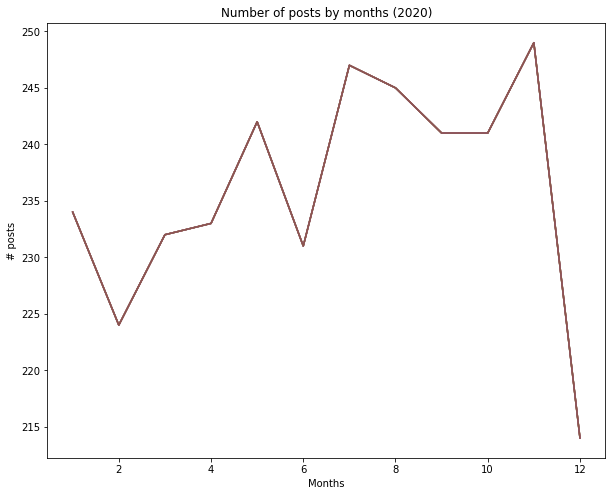

In [59]:
plt.figure(figsize=(10, 8))
plt.plot(df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2020)]['Month'].unique(), (df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2020)].groupby('Month').count()))
plt.title('Number of posts by months (2020)')
plt.ylabel('# posts')
plt.xlabel('Months')
plt.show()

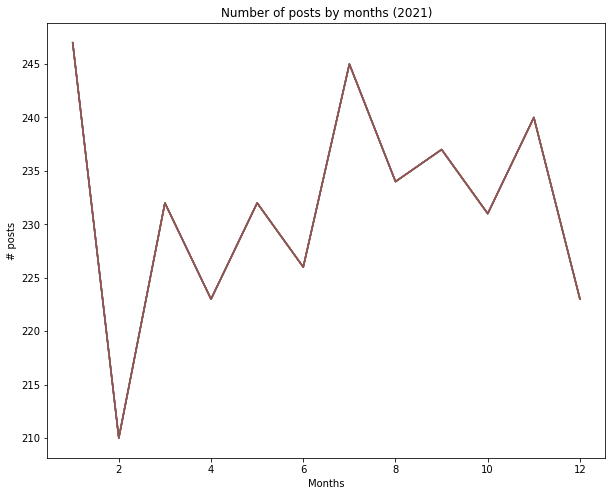

In [62]:
plt.figure(figsize=(10, 8))
plt.plot(df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2021)]['Month'].unique(), (df[(df['Datetime'].notnull()) & (df['Datetime'].dt.year==2021)].groupby('Month').count()))
plt.title('Number of posts by months (2021)')
plt.ylabel('# posts')
plt.xlabel('Months')
plt.show()

January and the summer months are those in which there is, on average, a higher activity of the instagram page. December is, on the other hand, generally among the months in which fewer posts are published.

There has been an increase in the number of posts published on a monthly basis by the page since summer 2019. In the previous period, in fact, between 80 and 110 posts per month were published. Thereafter, between 215 and 245 posts per month were published.

### Exporting the dataframe

In [63]:
df.drop(columns=['Month'], inplace=True)
df.to_csv('final.csv', index=False)

df

,Datetime,Text,Likes,Comments,Lang,Length
0,2015-01-06 13:53:23,This Economist is from a story published in A...,102.0,1.0,en,217
1,2015-01-06 18:14:26,How do members of the 114th Congress compare w...,111.0,6.0,en,281
2,2015-01-07 17:20:59,This Economist is from a story in June 2013....,77.0,4.0,en,315
3,2015-01-08 02:33:59,Catalans tend to be proud of their region's hi...,172.0,7.0,en,439
4,2015-01-08 16:34:26,This Economist is from a story published in A...,71.0,6.0,en,347
...,...,...,...,...,...,...
12209,2022-02-08 15:02:12,"On February 6th, more than a week after thousa...",3041.0,397.0,en,957
12210,2022-02-08 17:02:09,Omicron is set to overtake Delta as the global...,5483.0,210.0,en,607
12211,2022-02-08 19:02:55,British campaigners and lawmakers are in no do...,8456.0,228.0,en,739
12212,2022-02-08 21:01:50,Every year Disney and its rivals promise to sp...,7434.0,71.0,en,655
